In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline 

In [2]:
# import the dataset
%run init.ipynb

In [3]:
df

,Name,Age,Nationality,Overall,Potential,Club,League,League Level,Country,Region,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,Spanish Primera División,1,Spain,Europe,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
158023,L. Messi,30,Argentina,93,93,FC Barcelona,Spanish Primera División,1,Spain,Europe,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,French Ligue 1,1,France,Europe,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,Spanish Primera División,1,Spain,Europe,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,German Bundesliga,1,Germany,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,German Bundesliga,1,Germany,Europe,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
193080,De Gea,26,Spain,90,92,Manchester United,English Premier League,1,England,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,E. Hazard,26,Belgium,90,91,Chelsea,English Premier League,1,England,Europe,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
182521,T. Kroos,27,Germany,90,90,Real Madrid CF,Spanish Primera División,1,Spain,Europe,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0


In [4]:
# prepare data for analysis, by choosing required columns
start_col = df.columns.get_loc("Acceleration")
end_col = df.columns.get_loc("Preferred Positions")
columns_strip = [col for col in df.columns[start_col:end_col+1]]
not_in_start = columns_strip.index("GK diving")
not_in_end = columns_strip.index("GK reflexes")
del columns_strip[not_in_start:not_in_end+1]

In [5]:
# number of required columns of the dataset
len(columns_strip)

30

In [6]:
# list of required columns
columns_strip

['Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'Preferred Positions']

In [7]:
# explicitly rearange the attributes: attacking, defensive and mixed.
columns_att_def_mix = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','Preferred Positions']
df = df[columns_att_def_mix]

In [8]:
len(columns_att_def_mix)

30

In [9]:
# exclude goalkeepers from the dataset, since their attributes are very specific and it would be too obvious to recognize them.
df = df[df['Preferred Positions'] != 'GK']

In [10]:
df

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
ID,,,,,,,,,,,,,,,,,,,,,
20801,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST
158023,48,77,89,97,95,90,71,88,74,85,...,90,95,73,95,95,96,68,87,93,RW
190871,56,75,81,96,89,84,62,77,81,80,...,96,88,78,82,95,92,61,90,90,LW
176580,78,77,86,86,94,84,77,86,85,87,...,86,93,89,60,91,83,69,77,92,ST
188545,80,62,77,85,91,84,85,83,81,88,...,78,91,79,80,89,87,84,83,91,ST
183277,54,80,82,93,83,79,57,82,86,79,...,93,85,79,91,92,87,59,87,85,LW
182521,60,85,85,79,76,84,54,90,73,87,...,71,86,77,69,89,85,32,52,79,CDM
167664,50,68,74,84,91,62,86,82,70,88,...,75,88,72,69,85,86,79,80,92,ST
155862,84,66,73,61,60,67,91,55,68,79,...,79,85,84,60,84,80,93,77,52,CB


In [11]:
# confirm data integrity
df.isnull().values.any()


False

In [12]:
# a list of unique playing positions
postions_list = df['Preferred Positions'].str.split().apply(lambda x: x[0]).unique()

In [13]:
postions_list

array(['ST', 'RW', 'LW', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB',
       'CF', 'RWB', 'LWB'], dtype=object)

In [14]:
# normalize the attributes of the players for better performence during supervised learning
df_normalized = df.iloc[:,:-1].div(df.iloc[:,:-1].sum(axis=1), axis=0)

In [15]:
# create a positions map, that divides all of the positions into attacking (1) and defensive (0) ones.
positions_map = {'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1, 'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}
df_normalized['Preferred Positions'] = df['Preferred Positions']
df_normalized = df_normalized.replace({'Preferred Positions': positions_map})
# view the normalized mapped dataset
df_normalized

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
ID,,,,,,,,,,,,,,,,,,,,,
20801,0.027815,0.037528,0.035762,0.040177,0.041501,0.033554,0.038852,0.040618,0.037528,0.041501,...,0.039294,0.042384,0.040618,0.027815,0.041060,0.041943,0.041943,0.040177,0.041943,1
158023,0.021858,0.035064,0.040528,0.044171,0.043260,0.040984,0.032332,0.040073,0.033698,0.038707,...,0.040984,0.043260,0.033242,0.043260,0.043260,0.043716,0.030965,0.039617,0.042350,1
190871,0.026254,0.035162,0.037975,0.045007,0.041725,0.039381,0.029067,0.036099,0.037975,0.037506,...,0.045007,0.041256,0.036568,0.038444,0.044538,0.043132,0.028598,0.042194,0.042194,1
176580,0.035119,0.034669,0.038721,0.038721,0.042323,0.037821,0.034669,0.038721,0.038271,0.039172,...,0.038721,0.041873,0.040072,0.027015,0.040973,0.037371,0.031067,0.034669,0.041423,1
188545,0.036714,0.028453,0.035337,0.039009,0.041762,0.038550,0.039009,0.038091,0.037173,0.040385,...,0.035796,0.041762,0.036255,0.036714,0.040844,0.039927,0.038550,0.038091,0.041762,1
183277,0.025257,0.037418,0.038354,0.043499,0.038821,0.036950,0.026660,0.038354,0.040225,0.036950,...,0.043499,0.039757,0.036950,0.042563,0.043031,0.040692,0.027596,0.040692,0.039757,1
182521,0.027285,0.038654,0.038654,0.035925,0.034561,0.038199,0.024557,0.040928,0.033197,0.039563,...,0.032287,0.039109,0.035016,0.031378,0.040473,0.038654,0.014552,0.023647,0.035925,0
167664,0.024900,0.033865,0.036853,0.041833,0.045319,0.030876,0.042829,0.040837,0.034861,0.043825,...,0.037351,0.043825,0.035857,0.034363,0.042331,0.042829,0.039343,0.039841,0.045817,1
155862,0.038409,0.030178,0.033379,0.027892,0.027435,0.030636,0.041610,0.025149,0.031093,0.036123,...,0.036123,0.038866,0.038409,0.027435,0.038409,0.036580,0.042524,0.035208,0.023777,0


In [16]:
# split the data to training one and testing one.
# x_train should be equal to x_test
# y_train should be equal to y_test
x_train, x_test, y_train, y_test = train_test_split(df_normalized.iloc[:,:-1], df_normalized.iloc[:,-1], random_state=0)

In [17]:
# output the dimensions of training and testing datasets.
print('X train shape: {}'.format(x_train.shape))
print('X test shape: {}'.format(x_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))

X train shape: (11774, 29)
X test shape: (3925, 29)
y train shape: (11774,)
y test shape: (3925,)


# 2 groups of positions

## Logistic Regression

In [18]:
# create an instance of LogisticRegression class object
logistic_regression = LogisticRegression()
# fit the model
cl = logistic_regression.fit(x_train, y_train)
# predict the results and store them in a variable
predictions = logistic_regression.predict(x_test)
# check the accuracy of the predictions of our model
acc = cl.score(x_test, y_test)
print ('Logistic Regression Accuracy: {}'.format(acc))

Logistic Regression Accuracy: 0.8519745222929936


In [19]:
# the array of predictions obtained
predictions

array([1, 0, 1, ..., 0, 1, 0])

In [20]:
# the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

In [21]:
cm

array([[1366,  310],
       [ 271, 1978]])

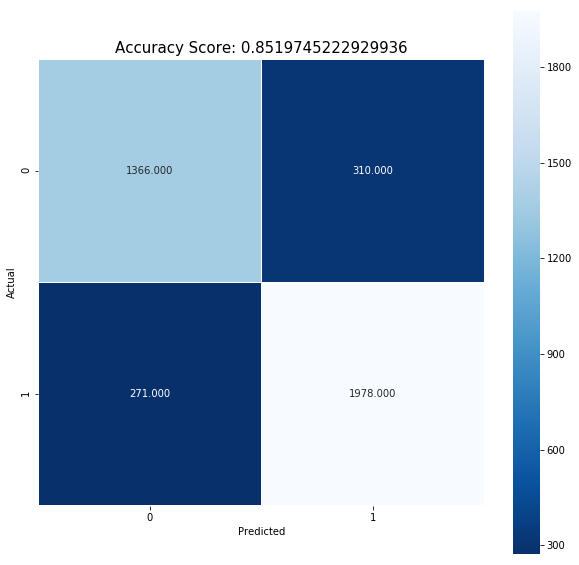

In [22]:
# using seaborn for visualizations
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

### Let's try to improve the accuracy

In [23]:
# calculate attributes importance
coef_list = list(sorted(zip(x_train.columns, abs(cl.coef_[0])),key=lambda x: -x[1]))
coef_table = pd.DataFrame(np.array(coef_list).reshape(-1,2), columns = ['Attributes', 'Importance'])
# print the importance table
print (coef_table)

            Attributes           Importance
0              Marking    17.19451388143638
1       Sliding tackle    16.39878513769514
2      Standing tackle    16.33087403787408
3        Interceptions    15.22108603729047
4            Finishing   12.702054111983022
5          Positioning    9.019476752525044
6              Volleys    8.747753690931965
7           Long shots    8.486815697041829
8           Aggression     6.98768865623568
9               Vision    6.574978149863563
10           Penalties   6.3980319352010175
11           Dribbling    6.369783691410106
12            Strength     5.61838049627165
13          Shot power    4.946640293680958
14               Curve    4.808617619754897
15  Free kick accuracy   4.4768862386420105
16    Heading accuracy    4.470598912232095
17             Agility     4.20159313338464
18             Jumping    4.016668360467874
19        Ball control   3.5362603181939702
20             Balance   3.1908391659408286
21        Acceleration     2.642

In [24]:
# let's select top 10 attributes only
target_cols = coef_table[:10]['Attributes'].tolist()
# and perform logistic regression on them
cl_10 = LogisticRegression().fit(x_train[target_cols], y_train)
acc_10 = cl_10.score(x_test[target_cols], y_test)
print ('Logistic Regression Accuracy (10 features): {}'.format(acc_10))

Logistic Regression Accuracy (10 features): 0.8563057324840765


### We can see that the accuracy has inproved, but not by much.

## Neural Networks

In [25]:
# create an instance of MLPClassifier class object
mlp = MLPClassifier(random_state=0)
# fit the model
cl_nn = mlp.fit(x_train, y_train)
# compute the accuracy
acc_nn = cl_nn.score(x_test, y_test)
# store  prediction results
predictions = cl_nn.predict(x_test)
print ('Neural Networks Accuracy (Default parameters): {}'.format(acc_nn))

Neural Networks Accuracy (Default parameters): 0.859108280254777


In [26]:
# custom parameters with search for optimal ones
parameters_n = [{'alpha': [0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes':[(10,),(20,),(100,)]}]
cl_nn_g = GridSearchCV(MLPClassifier(random_state=0), parameters_n)
cl_nn_g.fit(x_train, y_train)

print('Best score for training data:', cl_nn_g.best_score_)
print('Best alpha:',cl_nn_g.best_estimator_.alpha)
print('Best hidden_layer_sizes:',cl_nn_g.best_estimator_.hidden_layer_sizes)
print('Score for testing data:',cl_nn_g.score(x_test, y_test))

Best score for training data: 0.8633429590623407
Best alpha: 0.001
Best hidden_layer_sizes: (100,)
Score for testing data: 0.859108280254777


In [27]:
# display the prediction results
predictions

array([1, 0, 1, ..., 0, 1, 0])

### Neural networks (Multi-Layer Perceptron) give almost identical results, compared to logistic regression.

## Decision trees

In [28]:
# create an instance of DecisionTreeClassifier class object
dtc = tree.DecisionTreeClassifier()
# fit the model
cl_dt = dtc.fit(x_train, y_train)
# compute the accuracy
acc_dt = cl_dt.score(x_test, y_test)
# store  prediction results
predictions = cl_dt.predict(x_test)
# print the obtained accuracy
print ('Decision trees accuracy: {}'.format(acc_dt))

Decision trees accuracy: 0.8168152866242038


### As we can see, the accuracy suffered a little, compared to other classification models, studied above.

In [29]:
# display the prediction results
predictions

array([1, 1, 1, ..., 0, 1, 0])

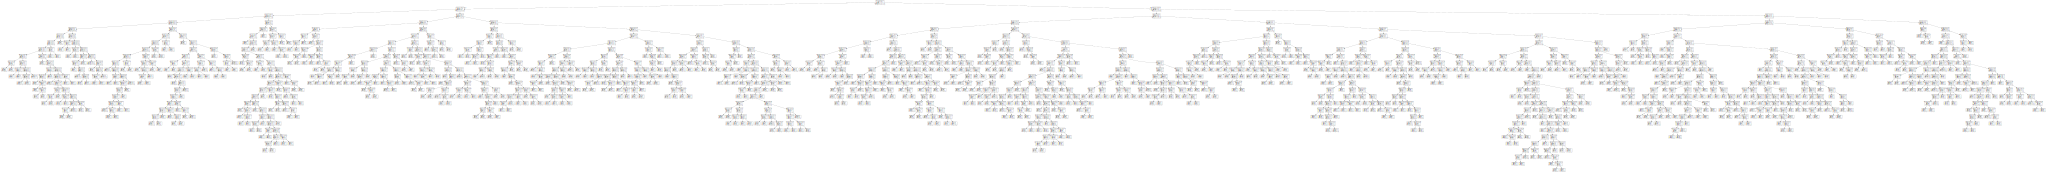

In [30]:
# visualize data on a graph
gr_data = tree.export_graphviz(cl_dt, out_file=None) 
graph = graphviz.Source(gr_data) 
graph.render("FIFA18DT2CL")
graph

# 14 groups of positions

In [31]:
df_normalized_all = df.iloc[:,:-1].div(df.iloc[:,:-1].sum(axis=1), axis=0)
# create a positions map, that divides all of the positions into individual groups
positions_map_all = {'ST': 0, 'RW': 1, 'LW': 2, 'RM': 3, 'CM': 4, 'LM': 5, 'CAM': 6, 'CF': 7, 'CDM': 8, 'CB': 9, 'LB': 10, 'RB': 11, 'RWB': 12, 'LWB': 13}
df_normalized_all['Preferred Positions'] = df['Preferred Positions']
df_normalized_all = df_normalized_all.replace({'Preferred Positions': positions_map_all})
# view the normalized mapped dataset
df_normalized_all

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
ID,,,,,,,,,,,,,,,,,,,,,
20801,0.027815,0.037528,0.035762,0.040177,0.041501,0.033554,0.038852,0.040618,0.037528,0.041501,...,0.039294,0.042384,0.040618,0.027815,0.041060,0.041943,0.041943,0.040177,0.041943,0
158023,0.021858,0.035064,0.040528,0.044171,0.043260,0.040984,0.032332,0.040073,0.033698,0.038707,...,0.040984,0.043260,0.033242,0.043260,0.043260,0.043716,0.030965,0.039617,0.042350,1
190871,0.026254,0.035162,0.037975,0.045007,0.041725,0.039381,0.029067,0.036099,0.037975,0.037506,...,0.045007,0.041256,0.036568,0.038444,0.044538,0.043132,0.028598,0.042194,0.042194,2
176580,0.035119,0.034669,0.038721,0.038721,0.042323,0.037821,0.034669,0.038721,0.038271,0.039172,...,0.038721,0.041873,0.040072,0.027015,0.040973,0.037371,0.031067,0.034669,0.041423,0
188545,0.036714,0.028453,0.035337,0.039009,0.041762,0.038550,0.039009,0.038091,0.037173,0.040385,...,0.035796,0.041762,0.036255,0.036714,0.040844,0.039927,0.038550,0.038091,0.041762,0
183277,0.025257,0.037418,0.038354,0.043499,0.038821,0.036950,0.026660,0.038354,0.040225,0.036950,...,0.043499,0.039757,0.036950,0.042563,0.043031,0.040692,0.027596,0.040692,0.039757,2
182521,0.027285,0.038654,0.038654,0.035925,0.034561,0.038199,0.024557,0.040928,0.033197,0.039563,...,0.032287,0.039109,0.035016,0.031378,0.040473,0.038654,0.014552,0.023647,0.035925,8
167664,0.024900,0.033865,0.036853,0.041833,0.045319,0.030876,0.042829,0.040837,0.034861,0.043825,...,0.037351,0.043825,0.035857,0.034363,0.042331,0.042829,0.039343,0.039841,0.045817,0
155862,0.038409,0.030178,0.033379,0.027892,0.027435,0.030636,0.041610,0.025149,0.031093,0.036123,...,0.036123,0.038866,0.038409,0.027435,0.038409,0.036580,0.042524,0.035208,0.023777,9


In [32]:
# split the data to training one and testing one.
# x_train_all should be equal to x_test_all
# y_train_all should be equal to y_test_all
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(df_normalized_all.iloc[:,:-1], df_normalized_all.iloc[:,-1], random_state=0)

In [33]:
# output the dimensions of training and testing datasets.
print('X train shape: {}'.format(x_train_all.shape))
print('X test shape: {}'.format(x_test_all.shape))
print('y train shape: {}'.format(y_train_all.shape))
print('y test shape: {}'.format(y_test_all.shape))

X train shape: (11774, 29)
X test shape: (3925, 29)
y train shape: (11774,)
y test shape: (3925,)


## Logistic Regression

In [34]:
# create an instance of LogisticRegression class object
logistic_regression_all = LogisticRegression()
# fit the model
cl_all = logistic_regression_all.fit(x_train_all, y_train_all)
# predict the results and store them in a variable
predictions_all = logistic_regression_all.predict(x_test_all)
# check the accuracy of the predictions of our model
acc_all = cl_all.score(x_test_all, y_test_all)
print ('Logistic Regression Accuracy: {}'.format(acc_all))

Logistic Regression Accuracy: 0.35668789808917195


In [35]:
# the array of predictionsobtained
predictions_all

array([4, 9, 0, ..., 9, 0, 9])

In [36]:
# the confusion matrix
cm_all = metrics.confusion_matrix(y_test_all, predictions_all)

In [37]:
cm_all

array([[550,   0,   0,   0,   8,   0,   0,   0,   0,   7,   0,   0,   0,
          0],
       [102,   0,   0,   0,   7,   0,   0,   0,   0,   5,   0,   0,   0,
          0],
       [ 92,   0,   0,   0,   6,   0,   0,   0,   0,   2,   0,   0,   0,
          0],
       [210,   0,   0,   0,  54,   0,   0,   0,   0,  63,   0,   0,   0,
          0],
       [ 73,   0,   0,   0, 204,   0,   0,   0,   0, 225,   0,   0,   0,
          0],
       [199,   0,   0,   0,  68,   0,   0,   0,   0,  69,   0,   0,   0,
          0],
       [173,   0,   0,   0,  67,   0,   0,   0,   0,  23,   0,   0,   0,
          0],
       [ 38,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  3,   0,   0,   0, 117,   0,   0,   0,   0, 223,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   7,   0,   0,   0,   0, 646,   0,   0,   0,
          0],
       [  7,   0,   0,   0,  47,   0,   0,   0,   0, 277,   0,   0,   0,
          0],
       [  3,   0,   0,   0,  22,   0,   0, 

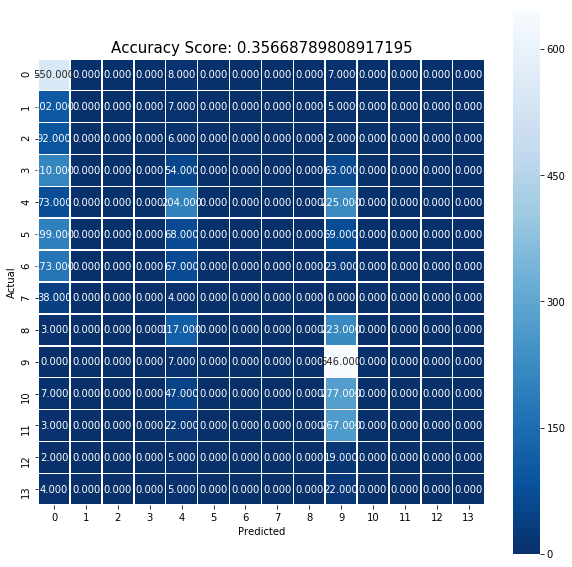

In [38]:
# using seaborn for visualizations
plt.figure(figsize=(10,10))
sns.heatmap(cm_all, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(acc_all)
plt.title(all_sample_title, size = 15);

### The accuracy obtained is a significant drop down, compared to 2 groups of playing positions.  Let's try to improve the accuracy.

In [39]:
# calculate attributes importance
coef_list_all = list(sorted(zip(x_train_all.columns, abs(cl.coef_[0])),key=lambda x: -x[1]))
coef_table_all = pd.DataFrame(np.array(coef_list_all).reshape(-1,2), columns = ['Attributes', 'Importance'])
# print the importance table
print (coef_table_all)

            Attributes           Importance
0              Marking    17.19451388143638
1       Sliding tackle    16.39878513769514
2      Standing tackle    16.33087403787408
3        Interceptions    15.22108603729047
4            Finishing   12.702054111983022
5          Positioning    9.019476752525044
6              Volleys    8.747753690931965
7           Long shots    8.486815697041829
8           Aggression     6.98768865623568
9               Vision    6.574978149863563
10           Penalties   6.3980319352010175
11           Dribbling    6.369783691410106
12            Strength     5.61838049627165
13          Shot power    4.946640293680958
14               Curve    4.808617619754897
15  Free kick accuracy   4.4768862386420105
16    Heading accuracy    4.470598912232095
17             Agility     4.20159313338464
18             Jumping    4.016668360467874
19        Ball control   3.5362603181939702
20             Balance   3.1908391659408286
21        Acceleration     2.642

In [40]:
clf_all = LogisticRegression().fit(x_train_all, y_train_all)
acc_all = clf_all.score(x_test_all, y_test_all)
print ('Logistic Regression Accuracy: {}'.format(acc_all))

Logistic Regression Accuracy: 0.35668789808917195


In [41]:
# let's select top 10 attributes only
target_cols_all = coef_table_all[:10]['Attributes'].tolist()
# and perform logistic regression on them
cl_10_all = LogisticRegression().fit(x_train_all[target_cols_all], y_train_all)
acc_10_all = cl_10_all.score(x_test_all[target_cols_all], y_test_all)
print ('Logistic Regression Accuracy (10 features): {}'.format(acc_10_all))

Logistic Regression Accuracy (10 features): 0.31133757961783437


### Unfortunately, it only has decreased the accuracy.

## Neural Networks

In [42]:
# create an instance of MLPClassifier class object
mlp_all = MLPClassifier(random_state=0)
# fit the model
cl_nn_all = mlp_all.fit(x_train_all, y_train_all)
# compute the accuracy
acc_nn_all = cl_nn_all.score(x_test_all, y_test_all)
# store  prediction results
predictions_all = cl_nn_all.predict(x_test_all)
print ('Neural Networks Accuracy (Default parameters): {}'.format(acc_nn_all))

Neural Networks Accuracy (Default parameters): 0.48203821656050955


In [43]:
# display the prediction results
predictions_all

array([4, 9, 0, ..., 8, 0, 9])

### Neural networks (Multi-Layer Perceptron) give better results, compared to logistic regression.

## Decision trees

In [44]:
# create an instance of DecisionTreeClassifier class object
dtc_all = tree.DecisionTreeClassifier()
# fit the model
cl_dt_all = dtc_all.fit(x_train_all, y_train_all)
# compute the accuracy
acc_dt_all = cl_dt_all.score(x_test_all, y_test_all)
# store  prediction results
predictions_all = cl_dt_all.predict(x_test_all)
# print the obtained accuracy
print ('Decision trees accuracy: {}'.format(acc_dt_all))

Decision trees accuracy: 0.3732484076433121


### As we can see, the accuracy suffered, compared to neural networks.

In [47]:
# display the prediction results
predictions_all

array([4, 6, 0, ..., 8, 1, 9])

In [49]:
# visualize data on a graph (just sore in .pdf because of scaling problems)
gr_data_all = tree.export_graphviz(cl_dt_all, out_file=None) 
graph = graphviz.Source(gr_data_all) 
graph.render("FIFA18DT2CL_ALL")

'FIFA18DT2CL_ALL.pdf'

### Let's try to include goalkeepers

In [53]:
# refresh dataset
%run init.ipynb

In [54]:
# explicitly rearange the attributes: attacking, defensive and mixed.
columns_att_def_mix = ['GK diving', 'GK handling', 'GK kicking','GK positioning', 'GK reflexes',
       'Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','Preferred Positions']
df = df[columns_att_def_mix]

In [56]:
df

,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Aggression,Crossing,Curve,Dribbling,Finishing,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
ID,,,,,,,,,,,,,,,,,,,,,
20801,7,11,15,14,11,63,85,81,91,94,...,89,96,92,63,93,95,95,91,95,ST
158023,6,11,15,14,8,48,77,89,97,95,...,90,95,73,95,95,96,68,87,93,RW
190871,9,9,15,15,11,56,75,81,96,89,...,96,88,78,82,95,92,61,90,90,LW
176580,27,25,31,33,37,78,77,86,86,94,...,86,93,89,60,91,83,69,77,92,ST
167495,91,90,95,91,89,29,15,14,30,13,...,52,85,44,35,48,70,78,61,12,GK
188545,15,6,12,8,10,80,62,77,85,91,...,78,91,79,80,89,87,84,83,91,ST
193080,90,85,87,86,90,38,17,21,18,13,...,60,88,40,43,42,64,67,58,12,GK
183277,11,12,6,8,8,54,80,82,93,83,...,93,85,79,91,92,87,59,87,85,LW
182521,10,11,13,7,10,60,85,85,79,76,...,71,86,77,69,89,85,32,52,79,CDM


In [57]:
# normalize data
df_all_normalized = df.iloc[:,:-1].div(df.iloc[:,:-1].sum(axis=1), axis=0)

In [60]:
# create a positions map, that divides all of the positions into attacking (1) and defensive (0) ones.
positions_map = {'GK':2, 'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1, 'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}
df_all_normalized['Preferred Positions'] = df['Preferred Positions']
df_all_normalized = df_all_normalized.replace({'Preferred Positions': positions_map})
# view the normalized mapped dataset
df_all_normalized

,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Aggression,Crossing,Curve,Dribbling,Finishing,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
ID,,,,,,,,,,,,,,,,,,,,,
20801,0.003013,0.004735,0.006457,0.006027,0.004735,0.027120,0.036591,0.034869,0.039173,0.040465,...,0.038313,0.041326,0.039604,0.027120,0.040034,0.040895,0.040895,0.039173,0.040895,1
158023,0.002667,0.004889,0.006667,0.006222,0.003556,0.021333,0.034222,0.039556,0.043111,0.042222,...,0.040000,0.042222,0.032444,0.042222,0.042222,0.042667,0.030222,0.038667,0.041333,1
190871,0.004106,0.004106,0.006843,0.006843,0.005018,0.025547,0.034215,0.036953,0.043796,0.040602,...,0.043796,0.040146,0.035584,0.037409,0.043339,0.041971,0.027828,0.041058,0.041058,1
176580,0.011373,0.010531,0.013058,0.013901,0.015586,0.032856,0.032435,0.036226,0.036226,0.039596,...,0.036226,0.039174,0.037489,0.025274,0.038332,0.034962,0.029065,0.032435,0.038753,1
167495,0.058221,0.057582,0.060781,0.058221,0.056942,0.018554,0.009597,0.008957,0.019194,0.008317,...,0.033269,0.054383,0.028151,0.022393,0.030710,0.044786,0.049904,0.039028,0.007678,2
188545,0.006726,0.002691,0.005381,0.003587,0.004484,0.035874,0.027803,0.034529,0.038117,0.040807,...,0.034978,0.040807,0.035426,0.035874,0.039910,0.039013,0.037668,0.037220,0.040807,1
193080,0.059133,0.055848,0.057162,0.056505,0.059133,0.024967,0.011170,0.013798,0.011827,0.008541,...,0.039422,0.057819,0.026281,0.028252,0.027595,0.042050,0.044021,0.038108,0.007884,2
183277,0.005039,0.005497,0.002749,0.003665,0.003665,0.024737,0.036647,0.037563,0.042602,0.038021,...,0.042602,0.038937,0.036189,0.041686,0.042144,0.039853,0.027027,0.039853,0.038937,1
182521,0.004444,0.004889,0.005778,0.003111,0.004444,0.026667,0.037778,0.037778,0.035111,0.033778,...,0.031556,0.038222,0.034222,0.030667,0.039556,0.037778,0.014222,0.023111,0.035111,0


In [61]:
# split the data to training one and testing one.
# x_train should be equal to x_test
# y_train should be equal to y_test
x_train, x_test, y_train, y_test = train_test_split(df_all_normalized.iloc[:,:-1], df_all_normalized.iloc[:,-1], random_state=0)

In [62]:
# output the dimensions of training and testing datasets.
print('X train shape: {}'.format(x_train.shape))
print('X test shape: {}'.format(x_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))

X train shape: (13260, 34)
X test shape: (4421, 34)
y train shape: (13260,)
y test shape: (4421,)


In [63]:
# create an instance of LogisticRegression class object
logistic_regression_allp = LogisticRegression()
# fit the model
cl_allp = logistic_regression_allp.fit(x_train, y_train)
# predict the results and store them in a variable
predictions_allp = logistic_regression_allp.predict(x_test)
# check the accuracy of the predictions of our model
acc_allp = cl_allp.score(x_test, y_test)
print ('Logistic Regression Accuracy: {}'.format(acc_allp))

Logistic Regression Accuracy: 0.8717484731961095


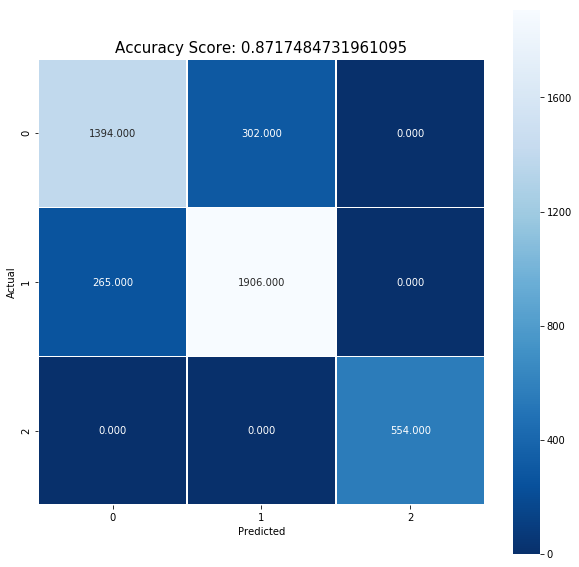

In [64]:
# calculate confusion matrix
cm_allp = metrics.confusion_matrix(y_test, predictions_allp)
# using seaborn for visualizations
plt.figure(figsize=(10,10))
sns.heatmap(cm_allp, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(acc_allp)
plt.title(all_sample_title, size = 15);

## As we can observe, the accuracy is slightly better, compared to 2 group classification, excluding GKs.

## Further improvements will be done...